In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import time

In [2]:
# 设置显示所有的列
pd.options.display.max_columns = None

In [3]:
pwd

'D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\House-price-regression-#1'

不知道为什么，cd命令的cell里不能有注释

mac路径

In [5]:
cd Kaggle/House-price-regression-#1/data

/Users/danielzhang/Documents/Python-Projects/DataAnalysis/Kaggle/House-price-regression-#1/data


windows路径

In [4]:
cd D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\House-price-regression-#1\\data

D:\Documents\MyProjects\DataAnalysis\Kaggle\House-price-regression-#1\data


# EDA

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [7]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

+ 查看一下目标变量Sales的分布  
由下面可以看出，Sales是明显的偏态分布，这意味着有可能需要对它做**Box-Cox**变换

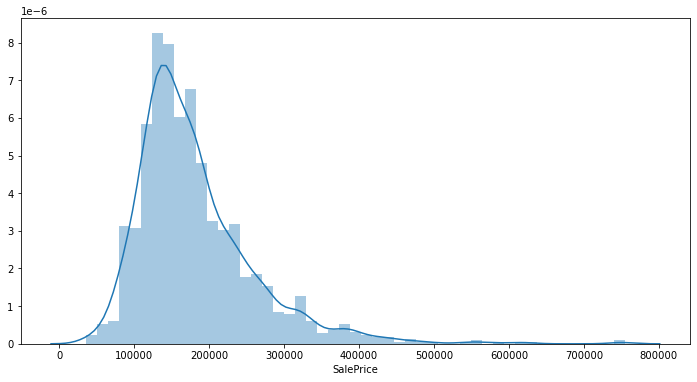

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(train['SalePrice'], ax=ax)

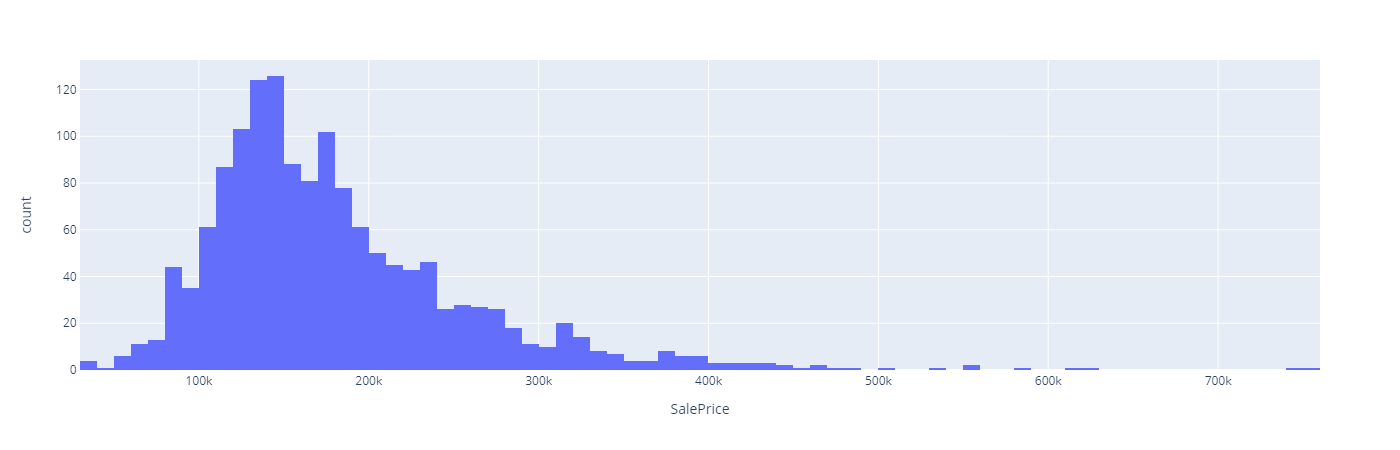

In [9]:
px.histogram(data_frame=train, x='SalePrice')

+ 初步探索各个变量和 SalesPrice 的相关性——相关性矩阵   

In [11]:
# 首先查看各个变量之间的相关系数，这里的相关系数只对数值特征进行计算
correlation_matrix = train.corr()

In [12]:
correlation_matrix.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

使用热力图来查看相关系数的情况

In [12]:
# 使用seaborn绘制
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(correlation_matrix, ax=ax)

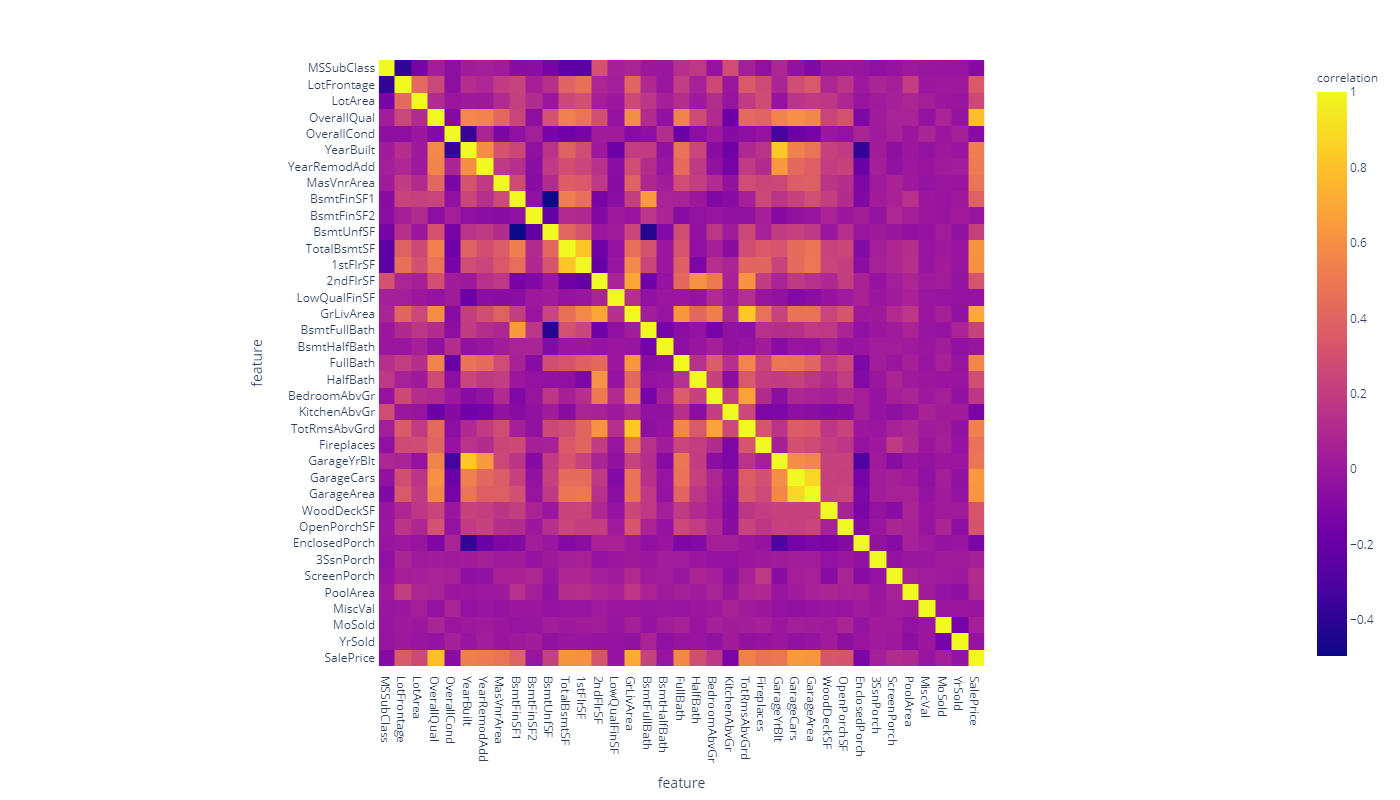

In [13]:
cols = correlation_matrix.columns
px.imshow(img=correlation_matrix, width=1000, height=800, x=cols, y=cols, labels={'x':'feature','y':'feature','color':'correlation'})
# trace = go.Heatmap()
# fig = go.Figure()

选择和SalePrice相关系数最高的前15个变量查看一下热力图

In [14]:
# 注意，这类是选择根据 SalePrice 降序的 top 10记录里，SalePrice 列的index，
# 不能直接选择DF，否则会出现 shape 的行数和列数不匹配的情况
correlation_top_index = correlation_matrix.nlargest(n=15, columns='SalePrice')['SalePrice'].index
correlation_top = train[correlation_top_index].corr()

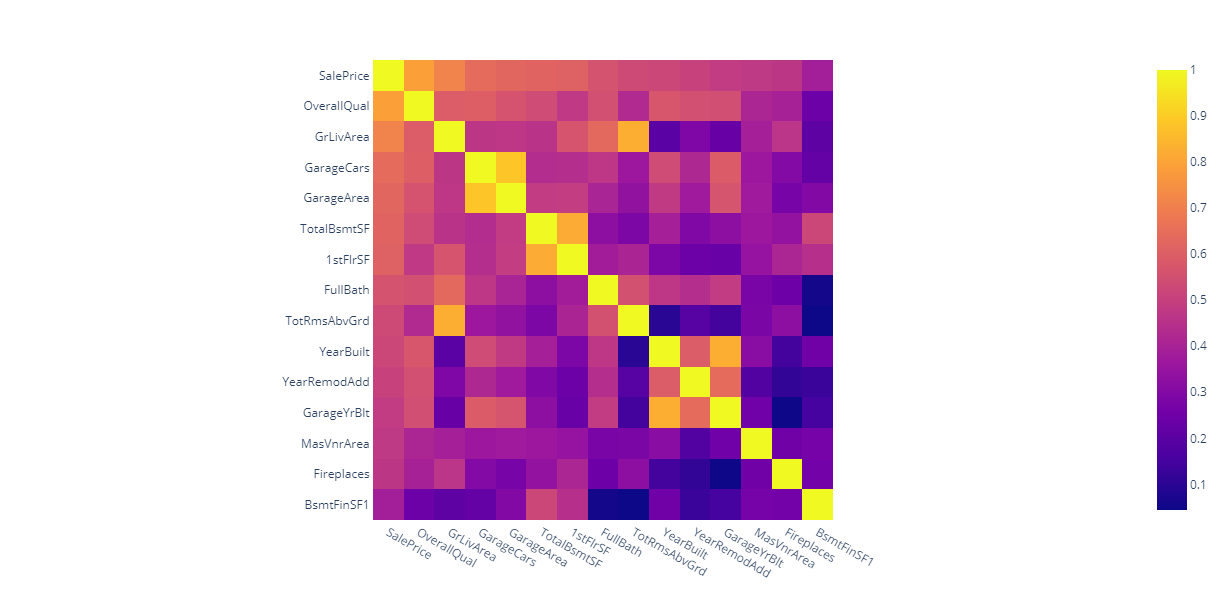

In [15]:
px.imshow(correlation_top, x=correlation_top_index, y=correlation_top_index, width=800, height=600)

In [16]:
correlation_top

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.790982   0.708624    0.640409    0.623431   
OverallQual    0.790982     1.000000   0.593007    0.600671    0.562022   
GrLivArea      0.708624     0.593007   1.000000    0.467247    0.468997   
GarageCars     0.640409     0.600671   0.467247    1.000000    0.882475   
GarageArea     0.623431     0.562022   0.468997    0.882475    1.000000   
TotalBsmtSF    0.613581     0.537808   0.454868    0.434585    0.486665   
1stFlrSF       0.605852     0.476224   0.566024    0.439317    0.489782   
FullBath       0.560664     0.550600   0.630012    0.469672    0.405656   
TotRmsAbvGrd   0.533723     0.427452   0.825489    0.362289    0.337822   
YearBuilt      0.522897     0.572323   0.199010    0.537850    0.478954   
YearRemodAdd   0.507101     0.550684   0.287389    0.420622    0.371600   
GarageYrBlt    0.486362     0.547766   0.231197    0.588920    0.564567   
MasVnrArea     0.477493     0.411876   0.390857    0.364204    0.373066   
Fireplaces     0.466929     0.396765   0.461679    0.300789    0.269141   
BsmtFinSF1     0.386420     0.239666   0.208171    0.224054    0.296970   

              TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  \
SalePrice        0.613581  0.605852  0.560664      0.533723   0.522897   
OverallQual      0.537808  0.476224  0.550600      0.427452   0.572323   
GrLivArea        0.454868  0.566024  0.630012      0.825489   0.199010   
GarageCars       0.434585  0.439317  0.469672      0.362289   0.537850   
GarageArea       0.486665  0.489782  0.405656      0.337822   0.478954   
TotalBsmtSF      1.000000  0.819530  0.323722      0.285573   0.391452   
1stFlrSF         0.819530  1.000000  0.380637      0.409516   0.281986   
FullBath         0.323722  0.380637  1.000000      0.554784   0.468271   
TotRmsAbvGrd     0.285573  0.409516  0.554784      1.000000   0.095589   
YearBuilt        0.391452  0.281986  0.468271      0.095589   1.000000   
YearRemodAdd     0.291066  0.240379  0.439046      0.191740   0.592855   
GarageYrBlt      0.322445  0.233449  0.484557      0.148112   0.825667   
MasVnrArea       0.363936  0.344501  0.276833      0.280682   0.315707   
Fireplaces       0.339519  0.410531  0.243671      0.326114   0.147716   
BsmtFinSF1       0.522396  0.445863  0.058543      0.044316   0.249503   

              YearRemodAdd  GarageYrBlt  MasVnrArea  Fireplaces  BsmtFinSF1  
SalePrice         0.507101     0.486362    0.477493    0.466929    0.386420  
OverallQual       0.550684     0.547766    0.411876    0.396765    0.239666  
GrLivArea         0.287389     0.231197    0.390857    0.461679    0.208171  
GarageCars        0.420622     0.588920    0.364204    0.300789    0.224054  
GarageArea        0.371600     0.564567    0.373066    0.269141    0.296970  
TotalBsmtSF       0.291066     0.322445    0.363936    0.339519    0.522396  
1stFlrSF          0.240379     0.233449    0.344501    0.410531    0.445863  
FullBath          0.439046     0.484557    0.276833    0.243671    0.058543  
TotRmsAbvGrd      0.191740     0.148112    0.280682    0.326114    0.044316  
YearBuilt         0.592855     0.825667    0.315707    0.147716    0.249503  
YearRemodAdd      1.000000     0.642277    0.179618    0.112581    0.128451  
GarageYrBlt       0.642277     1.000000    0.252691    0.046822    0.153484  
MasVnrArea        0.179618     0.252691    1.000000    0.249070    0.264736  
Fireplaces        0.112581     0.046822    0.249070    1.000000    0.260011  
BsmtFinSF1        0.128451     0.153484    0.264736    0.260011    1.000000

从上面的相关系数热力图可以找到如下几个信息：  
1. 和SalePrice有较强的线性关系的变量有：  
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd 这10个，它们的相关系数都在 0.5 以上；
2. 可能存在共线性关系的变量：  
GarageCars 和 GarageArea，  TotalBsmtSF 和 1stFlrSF， GrLivArea 和 TotRmsAbvGrd， YearBuilt 和 GarageYrBlt，这4对变量选择其中一个即可

这样，**前10个相关系数最高的特征里，选择的是 OverallQual, GrLivArea, GarageCars, ~GarageArea~, TotalBsmtSF, ~1stFlrSF~, FullBath, ~TotRmsAbvGrd~, YearBuilt, YearRemodAdd**.  
还有一个 GarageYrBlt 需要去除。

+ 选择最为相关的10个变量看一下 矩阵图  
Seaborn的pairplot绘图很慢，所以不能一次性查看太多变量的两两绘图  
这里也可以看出哪些变量可能有异常值

In [14]:
# cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']

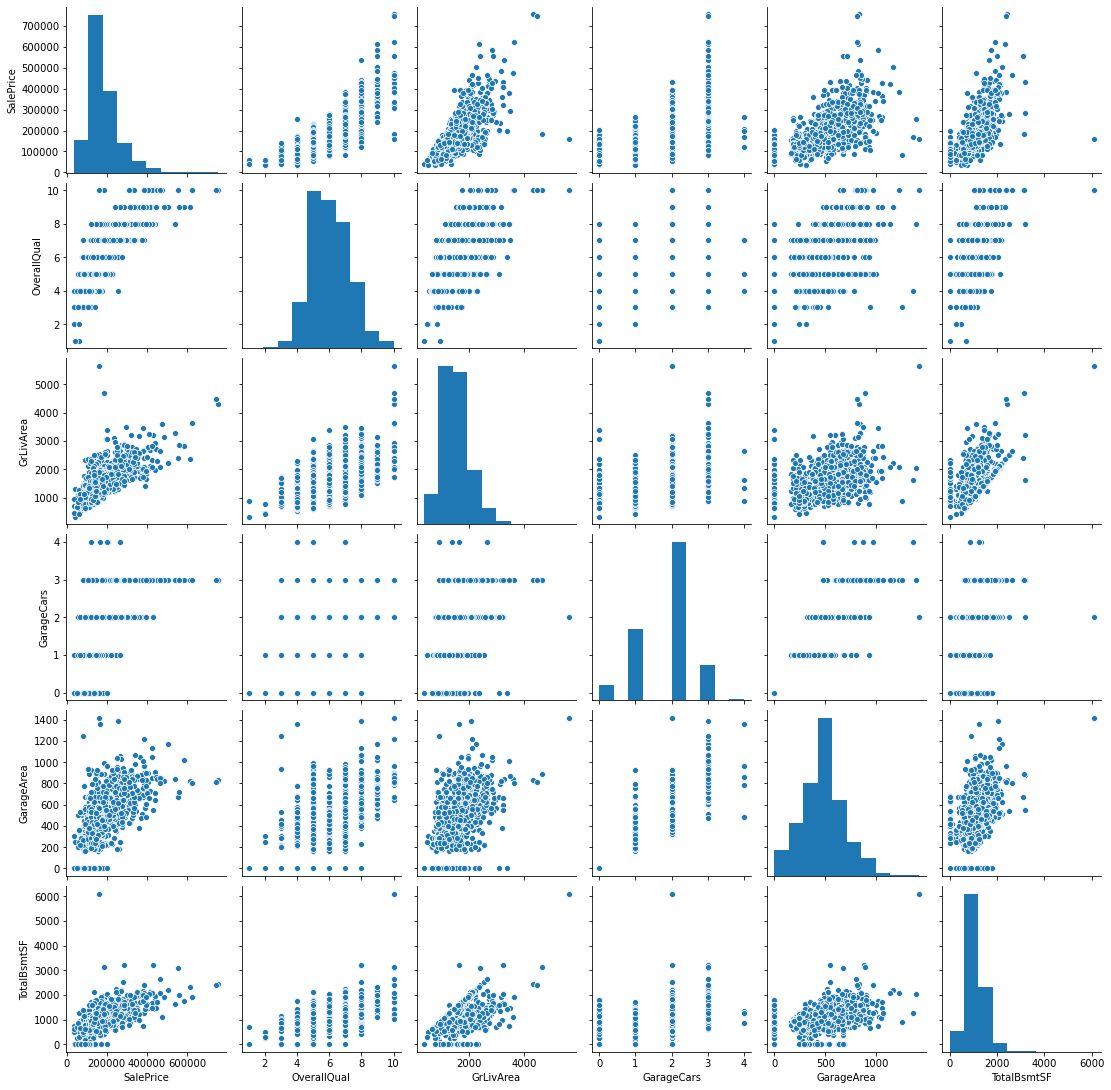

In [15]:
# fig, ax = plt.subplots(figsize=(12,6))
# sns.pairplot(train[correlation_top_index])
sns.pairplot(train[cols])

# 数据预处理

## 异常值

这里只对和Sales相关程度最高的5个变量进行异常值检测:  
'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'

+ OverallQual，这是个有序离散特征  
不过不对这个特征下做任何处理

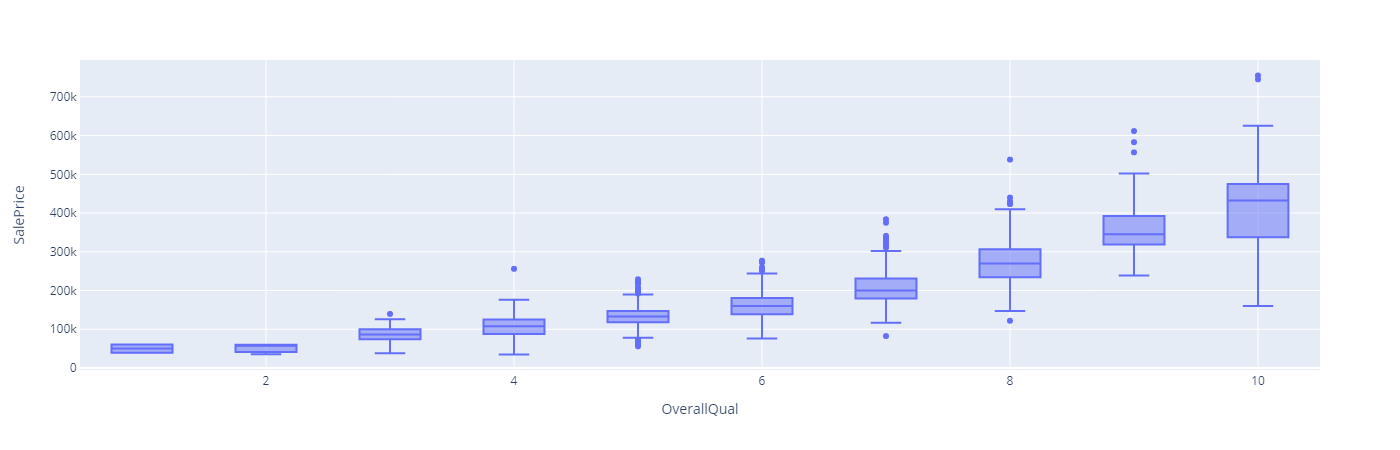

In [16]:
px.box(data_frame=train, x='OverallQual', y='SalePrice')

+ Sales和GrLivArea 
这里可以看出有两个异常值，GrLivArea = 4676 和 5642，需要删除

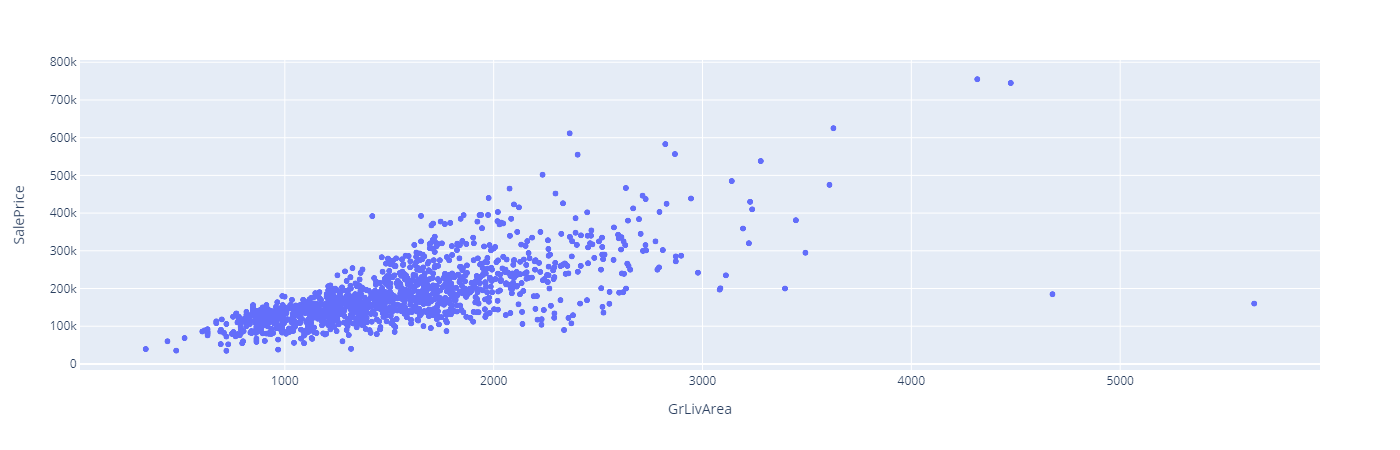

In [17]:
px.scatter(data_frame=train, x = 'GrLivArea', y = 'SalePrice')

+ GarageCars 和 GarageArea
这两个没有异常值

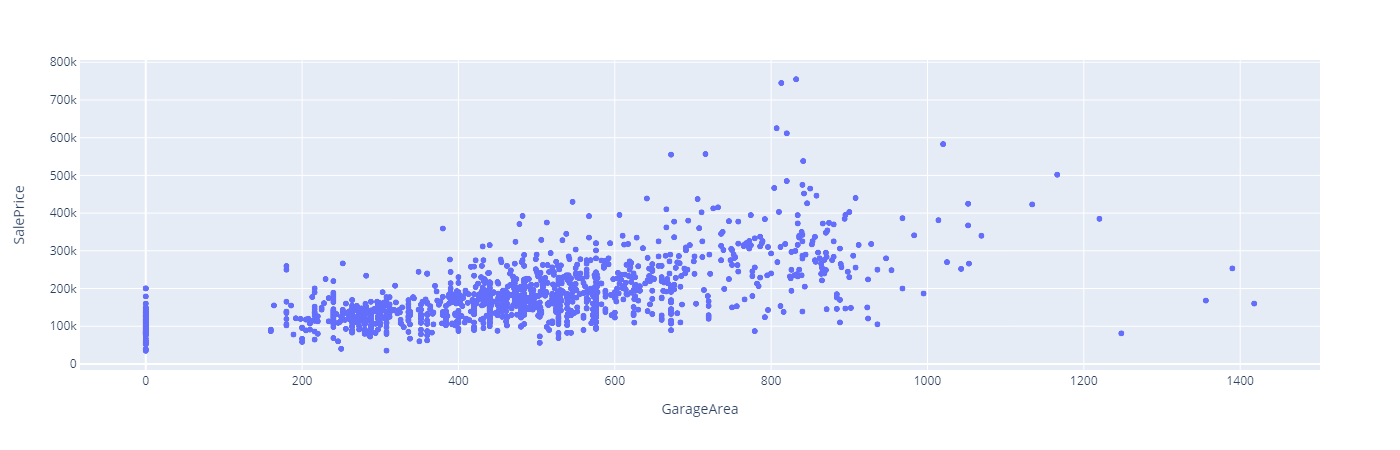

In [18]:
# px.scatter(data_frame=train, x = 'GarageCars', y = 'SalePrice')
px.scatter(data_frame=train, x = 'GarageArea', y = 'SalePrice')

+ Sales和TotalBsmtSF  
有一个异常值，TotalBsmtSF = 6110

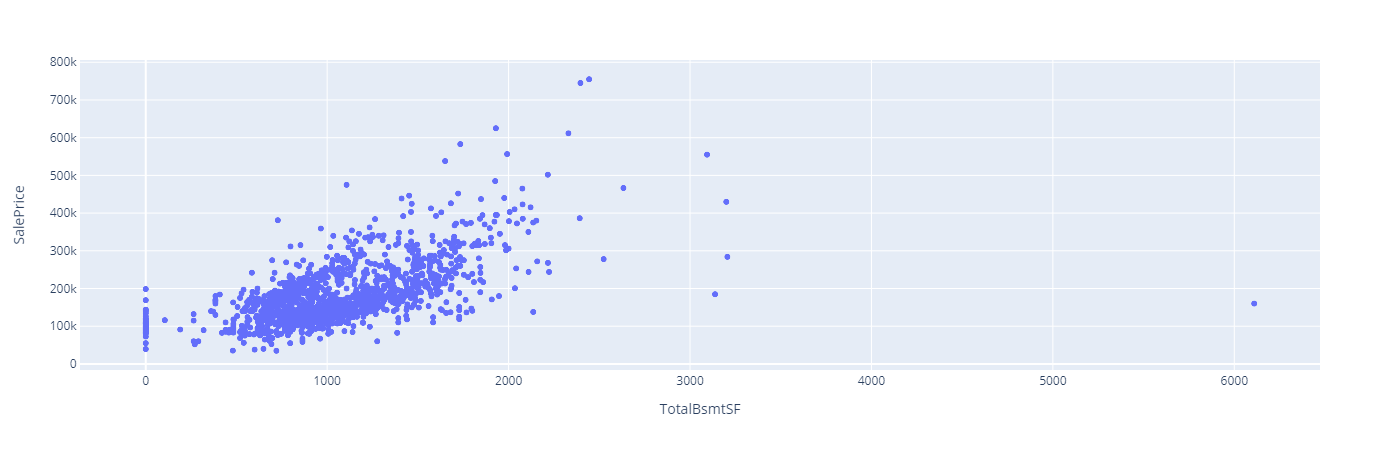

In [19]:
px.scatter(data_frame=train, x='TotalBsmtSF', y='SalePrice')

所以，最终要删除的异常值就三个：  
GrLivArea = 4676 和 5642， TotalBsmtSF = 6110

In [20]:
train = train[train['GrLivArea'] < 4600 ]
train = train[train['TotalBsmtSF'] < 6000]

检查一下结果

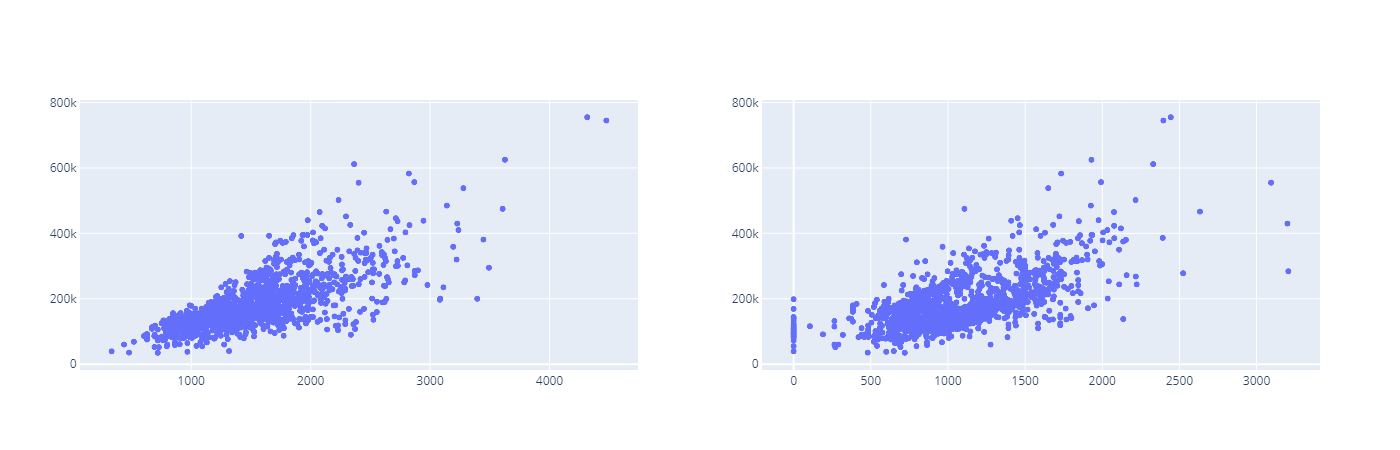

In [21]:
fig = make_subplots(1,2)
f1 = px.scatter(data_frame=train, x = 'GrLivArea', y = 'SalePrice')
f2 = px.scatter(data_frame=train, x='TotalBsmtSF', y='SalePrice')

fig.add_trace(f1.data[0], row=1, col=1)
fig.add_trace(f2.data[0], row=1, col=2)

fig.update_layout()
# fig.show()

## 缺失值

In [22]:
def miss_stat(df):
    """
    用于统计DF中各列的缺失值信息和占比
    """
    miss_num = df.isnull().sum()
    # miss_num[miss_num > 0].sort_values(ascending=False)
    total = df.shape[0]
    miss_persent = miss_num/total*100
    miss_info = pd.concat([miss_num, miss_persent, train.dtypes], axis = 1, keys=['miss_num', 'miss_percent','dtype'])
    miss_info['total'] = total
    miss_info = miss_info[['miss_num','total','miss_percent','dtype']]
#     降序排列，同时设置小数点的位数
    miss_info = miss_info.sort_values(by=['miss_num'],ascending=False).round(decimals=2)
#     打印
#     from IPython.display import display
#     display(miss_info[miss_info['miss_num'] > 0])  # 或者 print df.to_html()
#     print(miss_info[miss_info['miss_num'] > 0])
    return miss_info

def miss_stat_all(train, test):
    train_miss = miss_stat(train)
    test_miss = miss_stat(test)
    miss_info = train_miss.join(test_miss, lsuffix='_train', rsuffix='_test')
#     这里的逻辑与必须要使用pandas的 | ，而不是Python本身的 or
    miss_info = miss_info.loc[ (miss_info['miss_num_train'] > 0) | (miss_info['miss_num_test'] > 0), :].sort_values(by=['miss_num_train'],ascending=False)
    return miss_info

In [23]:
# miss_info = miss_stat(train)
# miss_info[miss_info['miss_num'] > 0]
miss_info = miss_stat_all(train, test)
miss_info

miss_num_train  total_train  miss_percent_train dtype_train  \
PoolQC                  1452         1458               99.59      object   
MiscFeature             1404         1458               96.30      object   
Alley                   1367         1458               93.76      object   
Fence                   1177         1458               80.73      object   
FireplaceQu              690         1458               47.33      object   
LotFrontage              259         1458               17.76     float64   
GarageYrBlt               81         1458                5.56     float64   
GarageCond                81         1458                5.56      object   
GarageType                81         1458                5.56      object   
GarageFinish              81         1458                5.56      object   
GarageQual                81         1458                5.56      object   
BsmtExposure              38         1458                2.61      object   
BsmtFinType2              38         1458                2.61      object   
BsmtCond                  37         1458                2.54      object   
BsmtQual                  37         1458                2.54      object   
BsmtFinType1              37         1458                2.54      object   
MasVnrType                 8         1458                0.55      object   
MasVnrArea                 8         1458                0.55     float64   
Electrical                 1         1458                0.07      object   
Utilities                  0         1458                0.00      object   
TotalBsmtSF                0         1458                0.00       int64   
BsmtUnfSF                  0         1458                0.00       int64   
BsmtFinSF2                 0         1458                0.00       int64   
BsmtFinSF1                 0         1458                0.00       int64   
Exterior2nd                0         1458                0.00      object   
Exterior1st                0         1458                0.00      object   
BsmtFullBath               0         1458                0.00       int64   
SaleType                   0         1458                0.00      object   
GarageArea                 0         1458                0.00       int64   
GarageCars                 0         1458                0.00       int64   
BsmtHalfBath               0         1458                0.00       int64   
KitchenQual                0         1458                0.00      object   
Functional                 0         1458                0.00      object   
MSZoning                   0         1458                0.00      object   

              miss_num_test  total_test  miss_percent_test dtype_test  
PoolQC               1456.0        1459              99.79     object  
MiscFeature          1408.0        1459              96.50     object  
Alley                1352.0        1459              92.67     object  
Fence                1169.0        1459              80.12     object  
FireplaceQu           730.0        1459              50.03     object  
LotFrontage           227.0        1459              15.56    float64  
GarageYrBlt            78.0        1459               5.35    float64  
GarageCond             78.0        1459               5.35     object  
GarageType             76.0        1459               5.21     object  
GarageFinish           78.0        1459               5.35     object  
GarageQual             78.0        1459               5.35     object  
BsmtExposure           44.0        1459               3.02     object  
BsmtFinType2           42.0        1459               2.88     object  
BsmtCond               45.0        1459               3.08     object  
BsmtQual               44.0        1459               3.02     object  
BsmtFinType1           42.0        1459               2.88     object  
MasVnrType             16.0        1459               1.10     object  
MasVnrArea            

In [24]:
miss_info.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'Utilities', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st',
       'BsmtFullBath', 'SaleType', 'GarageArea', 'GarageCars', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'MSZoning'],
      dtype='object')

In [25]:
# 根据数据集的说明，下面这些列里的NA都表示None,
cols_none_object = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
                   'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                   'MasVnrType']

# 下面这些列使用众数填充
cols_na_mode = ['Electrical','Exterior2nd', 'MSZoning', 'SaleType','KitchenQual','Functional', 'Exterior1st']

# 下面的列直接丢弃
cols_drop = ['Utilities']


# 下面这些列是数值列
cols_na_num = ['LotFrontage',   'MasVnrArea', 'GarageYrBlt', 'GarageArea', 'GarageCars',
               'BsmtFinSF1',  'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2',  'BsmtFullBath', 'BsmtHalfBath']

In [26]:
print( len(list(miss_info.index)) )
print( len(cols_none_object) + len(cols_na_num) +len(cols_na_mode) + len(cols_drop) )

34
34


+ 使用 None字符串 填充

In [27]:
for col in cols_none_object:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

+ 使用 众数 填充

In [28]:
for col in cols_na_mode:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

+ 直接丢弃的列

In [29]:
for col in cols_drop:
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

+ 数值列的填充

In [30]:
cols_num = ['MasVnrArea', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1',  'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2',  'BsmtFullBath', 'BsmtHalfBath']
for col in cols_num:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

检查是否还有缺失值

In [31]:
miss_info_check = miss_stat_all(train, test)
miss_info_check.head()

Empty DataFrame
Columns: [miss_num_train, total_train, miss_percent_train, dtype_train, miss_num_test, total_test, miss_percent_test, dtype_test]
Index: []

In [33]:
# 这里只丢弃了 Utilities 这一列
train.shape

(1458, 79)

## 特征工程

### 检查目标变量 SalePrice 的正态性

绘制KDE图

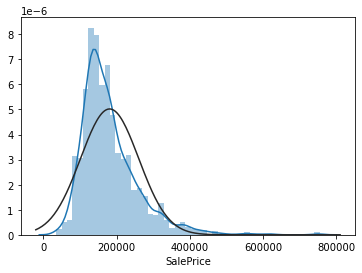

In [34]:
from scipy.stats import norm

sns.distplot(train['SalePrice'], fit=norm)

绘制Q-Q图

In [35]:
from scipy.stats import probplot
import statsmodels.api as sm

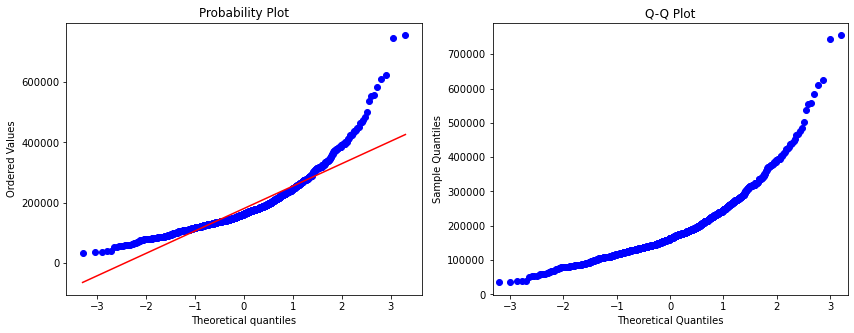

In [36]:
plt.ioff()
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 这一种绘制的其实不是严格的Q-Q图
probplot(train['SalePrice'], plot=ax1)

# 下面这个绘制的才是严格的Q-Q图
sm.qqplot(train['SalePrice'], ax=ax2)
ax2.set_title('Q-Q Plot')

plt.ion()

对 SalePrice 进行对数变换，再进行检查

In [40]:
train['SalePrice'] = np.log(train['SalePrice'])

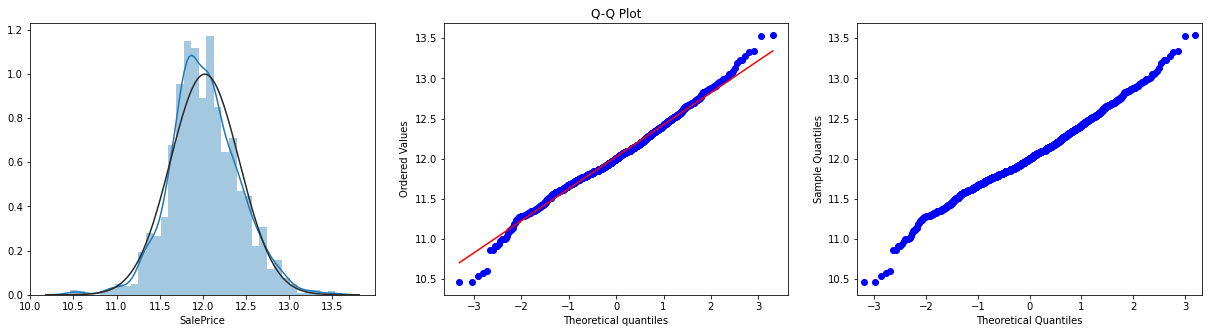

In [41]:
plt.ioff()
fig = plt.figure(figsize=(21,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(train['SalePrice'], fit=norm, ax=ax1)

# 这一种绘制的其实不是严格的Q-Q图
probplot(train['SalePrice'], plot=ax2)

# 下面这个绘制的才是严格的Q-Q图
sm.qqplot(train['SalePrice'], ax=ax3)
ax2.set_title('Q-Q Plot')

plt.ion()

### 有序分类特征处理

In [155]:
train.select_dtypes(include='object').head()

MSZoning Street Alley LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave  None      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL   Pave  None      Reg         Lvl       FR2       Gtl      Veenker   
2       RL   Pave  None      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL   Pave  None      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL   Pave  None      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish  \
0      SBrkr          Gd        Typ        None     Attchd          RFn   
1      SBrkr          TA        Typ          TA     Attchd          RFn   
2      SBrkr          Gd        Typ          TA     Attchd          RFn   
3      SBrkr          Gd        Typ          Gd     Detchd          Unf   
4      SBrkr          Gd        Typ          TA     Attchd          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [160]:
train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [42]:
# 名义类别变量
cat_nominal = ['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
               'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
               'Electrical','GarageType','MiscFeature','SaleType']

# 有序类别变量
cat_ordinal = ['LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','Functional',
               'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'PoolQC','Fence','SaleCondition']

In [46]:
print("名义变量个数：",len(cat_nominal))
print("有序变量个数",len(cat_ordinal))
print("总计个数：", len(cat_nominal) + len(cat_ordinal))
print("train的分类变量个数：", train.select_dtypes(include='object').shape[1])

名义变量个数： 23
有序变量个数 19
总计个数： 42
train的分类变量个数： 42


In [48]:
# 对于分类有序变量，需要自己定义变量里取值的顺序映射
# Utilities = ['ELO','NoSeWa','NoSewr','AllPub']
LandSlope = ['Sev','Mod','Gtl']
ExterQual = ['Po','Fa','TA','Gd','Ex']
ExterCond = ['Po','Fa','TA','Gd','Ex']
BsmtQual = ['None','Po','Fa','TA','Gd','Ex']
BsmtCond = ['None','Po','Fa','TA','Gd','Ex']
BsmtExposure = ['None','No','Mn','Av','Gd']
BsmtFinType1 = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
BsmtFinType2 = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
HeatingQC = ['Po','Fa','TA','Gd','Ex']
KitchenQual = ['Po','Fa','TA','Gd','Ex']
Functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
FireplaceQu = ['None', 'Po','Fa','TA','Gd','Ex' ]
GarageFinish = ['None','Unf','RFn','Fin']
GarageQual = ['None','Po','Fa','TA','Gd','Ex']
GarageCond = ['None','Po','Fa','TA','Gd','Ex']
PavedDrive = ['N','P','Y']
PoolQC = ['None','Fa','TA','Gd','Ex' ]
Fence = ['None','MnWw', 'GdWo', 'MnPrv','GdPrv']
SaleCondition = ['Partial','Family','Alloca','AdjLand','Abnorml','Normal']

cat_ordinal_ls = [LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,
                  BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive,
                  PoolQC, Fence, SaleCondition]

print('有序分类变量个数', len(cat_ordinal_ls))

有序分类变量个数 19


进行序数编码

In [49]:
train_ordinal = train[cat_ordinal]
train_ordinal.shape

(1458, 19)

In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc_ordinal = OrdinalEncoder(categories=cat_ordinal_ls)
enc_ordinal.fit(train_ordinal)

OrdinalEncoder(categories=[['Sev', 'Mod', 'Gtl'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'No', 'Mn', 'Av', 'Gd'],
                           ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1',
                            'Typ'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Unf', 'RFn', 'Fin'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA'

In [51]:
train_ordinal_enc = pd.DataFrame(enc_ordinal.transform(train_ordinal), columns=train_ordinal.columns)

测试数据处理

In [53]:
test_ordinal = test[cat_ordinal]
test_ordinal_enc = pd.DataFrame(enc_ordinal.transform(test_ordinal), columns=test_ordinal.columns)

### 名义分类特征处理

直接使用 onehot 编码

In [54]:
train_nonimal = train[cat_nominal]
train_nonimal.shape

(1458, 23)

In [55]:
from sklearn.preprocessing import OneHotEncoder
enc_onehot = OneHotEncoder(drop='if_binary', sparse=False)
enc_onehot.fit(train_nonimal)
train_nonimal_enc = pd.DataFrame(enc_onehot.transform(train_nonimal), columns=enc_onehot.get_feature_names(train_nonimal.columns))

处理测试数据

In [57]:
test_nonimal = test[cat_nominal]
test_nonimal_enc = pd.DataFrame(enc_onehot.transform(test_nonimal), columns=enc_onehot.get_feature_names(train_nonimal.columns))

### 合并数据

In [93]:
train_num = train.select_dtypes(exclude=['object'])
train_num.shape

(1458, 37)

In [101]:
train_cat = pd.concat([train_ordinal_enc, train_nonimal_enc], axis=1)
# 这里要注意设置index，否则下面concat的时候会出现问题
train_cat.set_index(train_num.index, inplace=True)
train_cat.shape

(1458, 183)

In [102]:
train_df = pd.concat([train_num, train_cat], axis=1)
train_df.shape

(1458, 220)

In [103]:
train_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           2003       196.0         706           0        150          856   
2           1976         0.0         978           0        284         1262   
3           2002       162.0         486           0        434          920   
4           1970         0.0         216           0        540          756   
5           2000       350.0         655           0        490         1145   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   
2       1262         0             0       1262             0             1   
3        920       866             0       1786             1             0   
4        961       756             0       1717             1             0   
5       1145      1053             0       2198             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                             
1          2         1             3             1             8           0   
2          2         0             3             1             6           1   
3          2         1             3             1             6           1   
4          1         0             3             1             7           1   
5          2         1             4             1             9           1   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                 
1        2003.0           2         548           0           61   
2        1976.0           2         460         298            0   
3        2001.0           2         608           0           42   
4        1998.0           3         642           0           35   
5        2000.0           3         836         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
Id                                                                             
1               0          0            0         0        0       2    2008   
2               0          0            0         0        0       5    2007   
3               0          0            0         0        0       9    2008   
4             272          0            0         0        0       2    2006   
5               0          0            0         0        0      12    2008   

    SalePrice  LandSlope  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                   
1   12.247694        2.0        3.0        2.0       4.0       3.0   
2   12.109011        2.0        2.0        2.0       4.0       3.0   
3   12.317167        2.0        3.0        2.0       4.0       3.0   
4   11.849398        2.0        2.0        2.0       3.0       4.0   
5   12.429216        2.0        3.0        2.0       4.0       3.0   

    BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  KitchenQual  \
Id                                                                     
1            1.0           6.0           1.0        4.0          3.0   
2            4.0           5.0           1.

In [106]:
test_num = test.select_dtypes(exclude=['object'])
test_cat = pd.concat([test_ordinal_enc, test_nonimal_enc], axis=1)
test_cat.set_index(test_num.index, inplace=True)

print(test_num.shape)
print(test_cat.shape)

(1459, 36)
(1459, 183)


In [107]:
test_df = pd.concat([test_num, test_cat], axis=1)
test_df.shape

(1459, 219)

In [108]:
test_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1461          20         80.0    11622            5            6       1961   
1462          20         81.0    14267            6            6       1958   
1463          60         74.0    13830            5            5       1997   
1464          60         78.0     9978            6            6       1998   
1465         120         43.0     5005            8            5       1992   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1461          1961         0.0       468.0       144.0      270.0   
1462          1958       108.0       923.0         0.0      406.0   
1463          1998         0.0       791.0         0.0      137.0   
1464          1998        20.0       602.0         0.0      324.0   
1465          1992         0.0       263.0         0.0     1017.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
Id                                                                             
1461        882.0       896         0             0        896           0.0   
1462       1329.0      1329         0             0       1329           0.0   
1463        928.0       928       701             0       1629           0.0   
1464        926.0       926       678             0       1604           0.0   
1465       1280.0      1280         0             0       1280           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                   
1461           0.0         1         0             2             1   
1462           0.0         1         1             3             1   
1463           0.0         2         1             3             1   
1464           0.0         2         1             3             1   
1465           0.0         2         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
Id                                                                    
1461             5           0       1961.0         1.0       730.0   
1462             6           0       1958.0         1.0       312.0   
1463             6           1       1997.0         2.0       482.0   
1464             7           1       1998.0         2.0       470.0   
1465             5           0       1992.0         2.0       506.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                     
1461         140            0              0          0          120   
1462         393           36              0          0            0   
1463         212           34              0          0            0   
1464         360           36              0          0            0   
1465           0           82              0          0          144   

      PoolArea  MiscVal  MoSold  YrSold  LandSlope  ExterQual  ExterCond  \
Id                                                                         
1461         0        0       6    2010        2.0        2.0        2.0   
1462         0    12500       6    2010        2.0        2.0        2.0   
1463         0        0       3    2010        2.0        2.0        2.0   
1464         0        0       6    2010        2.0        2.0        2.0   
1465         0        0       1    2010        2.0        3.0        2.0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  \
Id                                                                              
1461       3.0       3.0           1.0           3.0           2.0        2.0   
1462       3.0       3.0           1.0           5.0           1.0        2.0   
1463       4.0       3.0           1.0           6.0    

# 建模

先从训练数据中分离出特征和目标变量

In [109]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

划分测试集和训练集（训练+验证）

In [112]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [118]:
X_train.shape

(1020, 219)

In [119]:
X_test.shape

(438, 219)

## XGBoost模型

In [122]:
import xgboost as xgb
from xgboost import XGBRegressor as XGBR

from sklearn. model_selection import cross_val_score, GridSearchCV

In [123]:
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)

+ 先用XGBoost自带的库选择最佳的num_round

In [129]:
params = {
    'booster':'gbtree',
    'objective':'reg:squarederror',
    'eta':0.3,
    'gamma':0,
    'max_depth':3,
    'lambda':1,
    'alpha':0,
    'subsample':1,
    'eval_metric':['rmse']
}

num_round = 200

watch_list = [(dtrain, 'train'),(dtest, 'test')]

# bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round, evals=watch_list )

history = xgb.cv(params=params, dtrain=dtrain, num_boost_round=num_round, nfold=5)

In [132]:
history.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std  num_round
0         8.087388        0.005351        8.087334       0.032480          1
1         5.671325        0.003881        5.671247       0.034301          2
2         3.979678        0.002791        3.979585       0.032135          3
3         2.795968        0.002104        2.796277       0.028639          4
4         1.967618        0.001415        1.968190       0.024814          5

In [133]:
history['num_round'] = np.arange(1,201)

train_info = history.loc[:, ['num_round','train-rmse-mean','train-rmse-std']]
test_info = history.loc[:, ['num_round','test-rmse-mean','test-rmse-std']]

train_info.columns = ['num_round','rmse-mean','rmse-std']
test_info.columns = ['num_round','rmse-mean','rmse-std']
train_info['type'] = 'train'
test_info['type'] = 'test'

history_info = pd.concat([train_info, test_info], axis = 0)

In [134]:
history_info.head()

num_round  rmse-mean  rmse-std   type
0          1   8.087388  0.005351  train
1          2   5.671325  0.003881  train
2          3   3.979678  0.002791  train
3          4   2.795968  0.002104  train
4          5   1.967618  0.001415  train

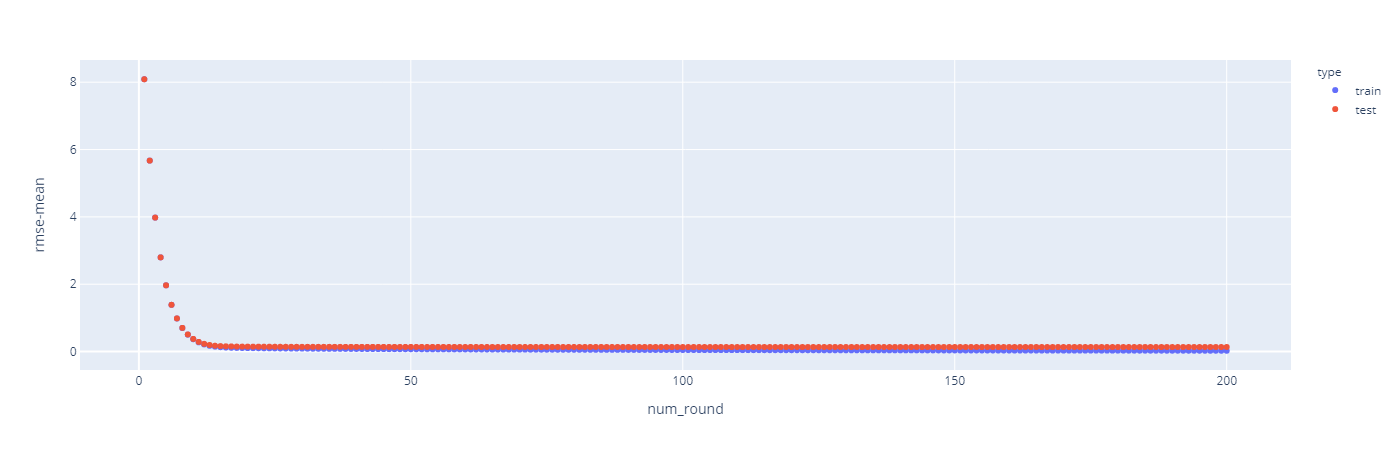

In [135]:
px.scatter(data_frame=history_info, x = 'num_round', y='rmse-mean',color='type')

+ 使用Sklearn接口调试

In [141]:
param_grid = {
    'n_estimators':np.arange(20,200, 5)
}

In [142]:
xgbr_cv = GridSearchCV(
    XGBR(booster='gbtree',objective='reg:squarederror',  random_state=29),
    param_grid = param_grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

In [143]:
%%time
xgbr_cv.fit(X_train, y_train)

Wall time: 24.7 s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_j...
                                    num_parallel_tree=None, random_state=29,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramete

In [144]:
xgbr_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=165, n_jobs=0, num_parallel_tree=1, random_state=29,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
cv_results = xgbr_cv.cv_results_
# cv_results
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.shape

(36, 14)

In [147]:
cv_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.253599      0.014180         0.007000        0.001095   
1       0.331797      0.017406         0.007400        0.000490   
2       0.408399      0.016776         0.007201        0.000401   
3       0.471399      0.019085         0.008200        0.001470   
4       0.545999      0.018857         0.006800        0.000400   

  param_n_estimators                params  split0_test_score  \
0                 20  {'n_estimators': 20}          -0.025889   
1                 25  {'n_estimators': 25}          -0.025837   
2                 30  {'n_estimators': 30}          -0.025218   
3                 35  {'n_estimators': 35}          -0.025203   
4                 40  {'n_estimators': 40}          -0.024652   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -0.029384          -0.024090          -0.013214          -0.018980   
1          -0.027533          -0.022526          -0.012329          -0.018463   
2          -0.027239          -0.022067          -0.012559          -0.018147   
3          -0.026769          -0.021687          -0.012206          -0.018313   
4          -0.026627          -0.021506          -0.012046          -0.018445   

   mean_test_score  std_test_score  rank_test_score  
0        -0.022311        0.005654               36  
1        -0.021338        0.005467               35  
2        -0.021046        0.005239               34  
3        -0.020836        0.005212               33  
4        -0.020655        0.005126               32

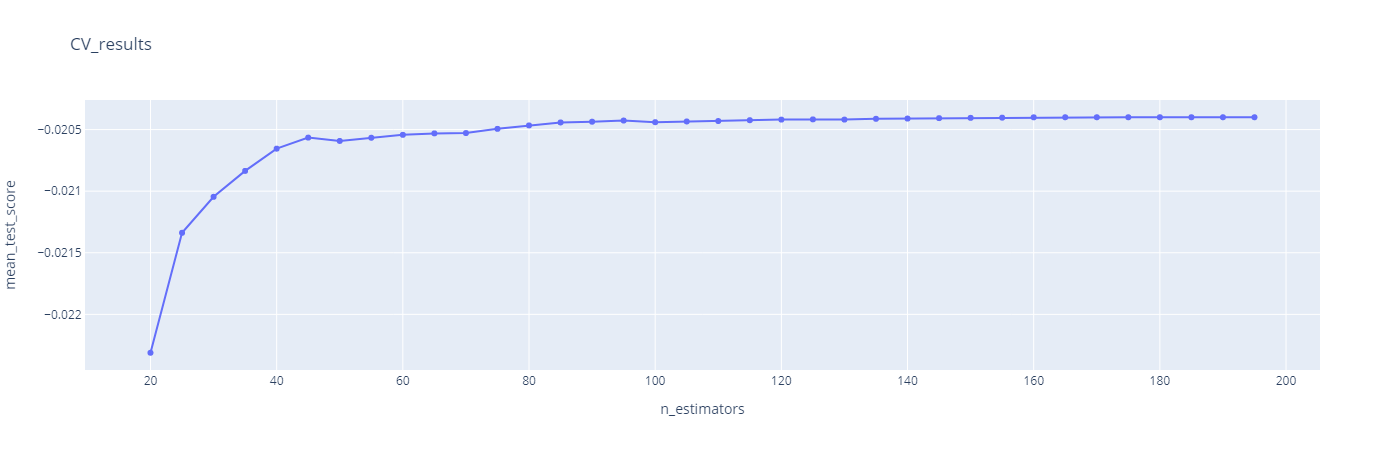

In [148]:
trace=go.Scatter(x=cv_results_df['param_n_estimators'], y=cv_results_df['mean_test_score'], mode='lines+markers', name='CV_results')
layout = go.Layout(
    title='CV_results',
    xaxis=go.layout.XAxis(title='n_estimators'),
    yaxis=go.layout.YAxis(title='mean_test_score')
)
fig = go.Figure(data=trace,layout=layout)

fig.show()